# Geopandas Intro

**Inhalt: ** Erste Schritte mit Geopandas

**Nötige Skills**
- Basic pandas skills
- Funktionen und pandas

**Lernziele**
- Shapes kennenlernen
- Punkte und Linien erstellen
- Geodataframes erstellen
- Geometrien definieren
- Plotten in Geopandas

## Das Beispiel

Bergbahnen in der Schweiz

## Setup

In [6]:
!pip install geopandas

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import pandas as pd

In [8]:
import geopandas as gpd
from shapely.geometry import Point, LineString

In [9]:
%matplotlib inline

## Import

**Ein Shapefile für die Schweizer Kantone**

In [10]:
gdf_kantone = gpd.read_file('dataprojects/Projections/shp/g1k17.shp')

In [11]:
gdf_kantone.head(2)

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Zürich,4,172894,669244,716900,223896,283343,691800,252000,...,1291,533,504,2669244,2716900,1223896,1283343,2691800,1252000,"POLYGON ((692429.202 281173.707, 692993.467 28..."
1,2,Bern / Berne,2,595952,556241,677745,130585,243834,614200,185600,...,4271,1198,979,2556241,2677745,1130585,1243834,2614200,1185600,"MULTIPOLYGON (((573502.204 194804.720, 573996...."


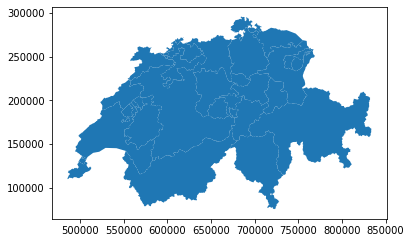

In [12]:
gdf_kantone.plot()

**Eine Liste der Bergbahnen**

In [13]:
df_bergbahnen = pd.read_excel('dataprojects/Projections/data/bergbahnen3D.xlsx')

In [14]:
df_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902


In [15]:
df_bergbahnen['OBJEKTART'].value_counts()

Skilift         841
Sesselbahn      365
Luftseilbahn    327
Gondelbahn      124
Name: OBJEKTART, dtype: int64

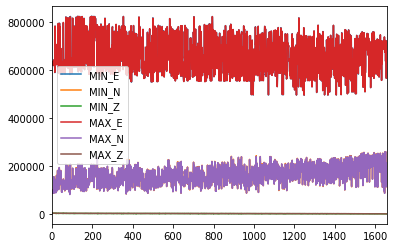

In [21]:
df_bergbahnen.plot()

## Geometrien in Geopandas

In unserem Shapefile der Kantone (\*.shp) ist bereits eine Geometrie definiert: Eine separate Spalte in jedem Kanton ist dafür reserviert.

In [22]:
gdf_kantone.columns

Index(['KTNR', 'KTNAME', 'GRNR', 'AREA_HA', 'X_MIN', 'X_MAX', 'Y_MIN', 'Y_MAX',
       'X_CNTR', 'Y_CNTR', 'Z_MIN', 'Z_MAX', 'Z_AVG', 'Z_MED', 'E_MIN',
       'E_MAX', 'N_MIN', 'N_MAX', 'E_CNTR', 'N_CNTR', 'geometry'],
      dtype='object')

In der Geometrie-Spalte sind (Überraschung!) geometrische Informationen drin. In diesem Fall: ein Polygon.

In [23]:
gdf_kantone.geometry

0     POLYGON ((692429.202 281173.707, 692993.467 28...
1     MULTIPOLYGON (((573502.204 194804.720, 573996....
2     POLYGON ((662037.558 237690.723, 662271.728 23...
3     POLYGON ((688456.999 203340.000, 688740.000 20...
4     POLYGON ((705202.678 229721.111, 706142.258 22...
5     MULTIPOLYGON (((671653.400 190588.001, 671407....
6     POLYGON ((671798.251 206022.836, 672021.878 20...
7     POLYGON ((723477.400 221272.410, 723896.499 22...
8     POLYGON ((674191.900 231111.999, 674454.750 23...
9     MULTIPOLYGON (((549140.980 178013.761, 549375....
10    MULTIPOLYGON (((619250.502 223755.124, 619395....
11    POLYGON ((619154.867 272278.575, 617536.204 27...
12    MULTIPOLYGON (((595269.700 251478.499, 594298....
13    MULTIPOLYGON (((686912.793 272390.067, 686814....
14    POLYGON ((758852.593 259182.820, 758918.982 25...
15    MULTIPOLYGON (((746530.217 250212.577, 746449....
16    POLYGON ((759598.570 267841.931, 760034.120 26...
17    POLYGON ((760618.874 213990.948, 760944.58

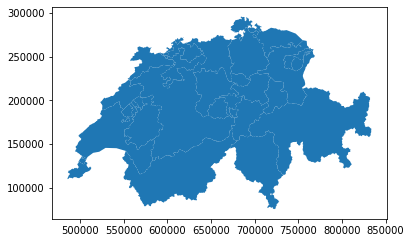

In [24]:
gdf_kantone.plot()

Unsere Bergbahnen-Liste hat allerdings noch keine Geometrie-Spalte:

In [25]:
df_bergbahnen.columns

Index(['OBJEKTART', 'NAME', 'MIN_E', 'MIN_N', 'MIN_Z', 'MAX_E', 'MAX_N',
       'MAX_Z'],
      dtype='object')

Wir müssen erst eine Geometrie erstellen!

### Punkte (Again!)

**Let's make a point!**

Quiz: Erstellen Sie einen Punkt am Ort (5, -7)

**in Pandas**

Was wir wollen, ist: eine Spalte in unserem Dataframe, die für jede Bergbahn eine Punkt-Geometrie enthält

... die umständliche Variante mit einer separaten Funktion:

In [26]:
def make_point(row):
    x = row['MIN_E']
    y = row['MIN_N']
    return Point(x, y)

In [27]:
df_bergbahnen.apply(make_point, axis=1)

0        POINT (621759 85777)
1        POINT (622730 86797)
2        POINT (621991 91079)
3        POINT (621542 87239)
4        POINT (621517 87222)
5       POINT (635480 100882)
6       POINT (635509 100873)
7        POINT (621494 87233)
8        POINT (618779 86517)
9        POINT (621184 88240)
10      POINT (642130 155229)
11       POINT (628987 93322)
12      POINT (635482 101412)
13       POINT (621939 91007)
14       POINT (619879 88521)
15      POINT (589429 103726)
16      POINT (783301 145084)
17       POINT (627027 95334)
18       POINT (628865 92876)
19       POINT (628634 94280)
20       POINT (621984 90973)
21      POINT (635286 103618)
22      POINT (640622 109797)
23      POINT (704665 161047)
24      POINT (641390 138598)
25       POINT (626887 96228)
26       POINT (627720 97646)
27      POINT (624520 141678)
28      POINT (675497 181088)
29      POINT (674736 181726)
                ...          
1627    POINT (605706 175443)
1628    POINT (681760 240819)
1629    PO

... oder die schnelle Variante mit einer Lambda-Funktion:

(remember Lambda-Funktionen? Eine Funktion, die keinen Namen trägt!)

In [28]:
df_bergbahnen['Punkt1'] = df_bergbahnen.apply(lambda row: Point(row['MIN_E'], row['MIN_N']), axis=1)

In [29]:
df_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797)


Wir haben jetzt eine Geometrie erstellt - jetzt müssen wir Geopandas noch mitteilen, dass wir diese Geometrie verwenden wollen!

### Geopandas

Das hier geht zum jetzigen Zeitpunkt noch nicht:

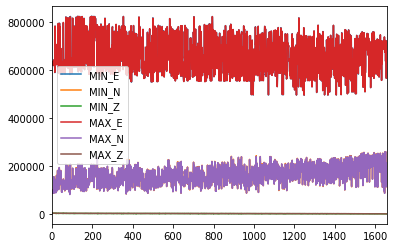

In [30]:
df_bergbahnen.plot()

Wir müssen aus dem Dataframe erst ein Geodataframe erstellen!

**Geodataframe konstruieren**

Die Konstruktor-Funktion heisst `GeoDataFrame()`. Zwei Infos sind nötig:
- Aus welchem Dataframe soll ein Geodataframe werden
- Welche Spalte soll die Geometrie definieren

In [31]:
gdf_bergbahnen = gpd.GeoDataFrame(df_bergbahnen, geometry='Punkt1')

In [32]:
gdf_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759.000 85777.000)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730.000 86797.000)


Jetzt können wir plotten:

In [33]:
gdf_bergbahnen.geometry

0        POINT (621759.000 85777.000)
1        POINT (622730.000 86797.000)
2        POINT (621991.000 91079.000)
3        POINT (621542.000 87239.000)
4        POINT (621517.000 87222.000)
5       POINT (635480.000 100882.000)
6       POINT (635509.000 100873.000)
7        POINT (621494.000 87233.000)
8        POINT (618779.000 86517.000)
9        POINT (621184.000 88240.000)
10      POINT (642130.000 155229.000)
11       POINT (628987.000 93322.000)
12      POINT (635482.000 101412.000)
13       POINT (621939.000 91007.000)
14       POINT (619879.000 88521.000)
15      POINT (589429.000 103726.000)
16      POINT (783301.000 145084.000)
17       POINT (627027.000 95334.000)
18       POINT (628865.000 92876.000)
19       POINT (628634.000 94280.000)
20       POINT (621984.000 90973.000)
21      POINT (635286.000 103618.000)
22      POINT (640622.000 109797.000)
23      POINT (704665.000 161047.000)
24      POINT (641390.000 138598.000)
25       POINT (626887.000 96228.000)
26       POI

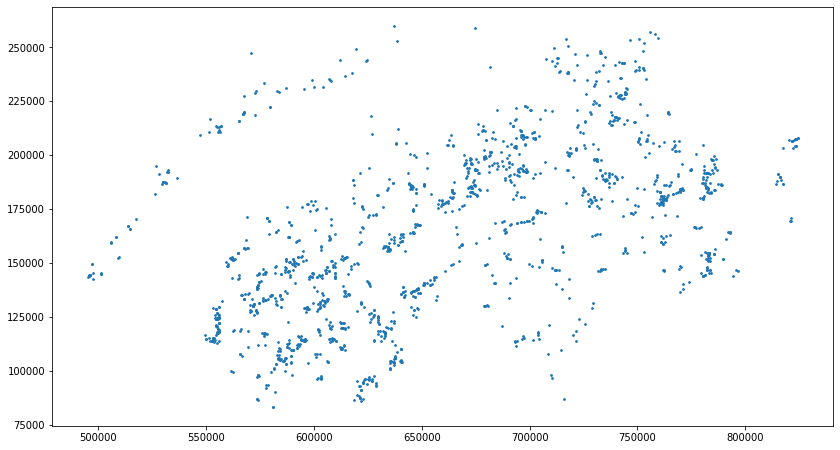

In [34]:
gdf_bergbahnen.plot(figsize=(14,10), markersize=3)

Oder zB auch nur einzele, ausgewählte Objekte:

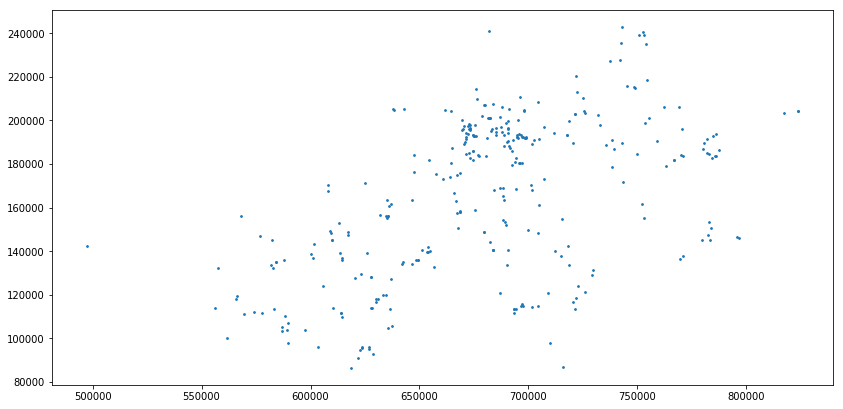

In [25]:
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3)

## Geometrien 2

Allerdings - moment mal. Unsere Seilbahnen sind eigentlich keine Punkte, sondern müssten eigentlich eine Linie sein - mit einem Anfang und einem Ende.

### Linie (again!)

**Quiz:** Erstellen Sie eine Linie durch die Punkte (8, 6) und (4, 10)

In [54]:
gdf_bergbahnen['Linie'] = gdf_bergbahnen.apply(lambda row: LineString([row['Punkt1'], row['Punkt2']]), axis=1)

ValueError: ('Input [<shapely.geometry.linestring.LineString object at 0x000001FF88B2A7F0>, <shapely.geometry.linestring.LineString object at 0x000001FF89479780>] is the wrong shape for a LineString', 'occurred at index 0')

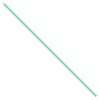

In [52]:
df_bergbahnen['Punkt2'] = df_bergbahnen.apply(lambda row: LineString([Point(x2a, y2a), Point(x2b, y2b)])), axis=1)

SyntaxError: invalid syntax (<ipython-input-52-84e8dfa51167>, line 1)

In [53]:
df_bergbahnen['Punkt2']

0       LINESTRING (8 6, 4 10)
1       LINESTRING (8 6, 4 10)
2       LINESTRING (8 6, 4 10)
3       LINESTRING (8 6, 4 10)
4       LINESTRING (8 6, 4 10)
5       LINESTRING (8 6, 4 10)
6       LINESTRING (8 6, 4 10)
7       LINESTRING (8 6, 4 10)
8       LINESTRING (8 6, 4 10)
9       LINESTRING (8 6, 4 10)
10      LINESTRING (8 6, 4 10)
11      LINESTRING (8 6, 4 10)
12      LINESTRING (8 6, 4 10)
13      LINESTRING (8 6, 4 10)
14      LINESTRING (8 6, 4 10)
15      LINESTRING (8 6, 4 10)
16      LINESTRING (8 6, 4 10)
17      LINESTRING (8 6, 4 10)
18      LINESTRING (8 6, 4 10)
19      LINESTRING (8 6, 4 10)
20      LINESTRING (8 6, 4 10)
21      LINESTRING (8 6, 4 10)
22      LINESTRING (8 6, 4 10)
23      LINESTRING (8 6, 4 10)
24      LINESTRING (8 6, 4 10)
25      LINESTRING (8 6, 4 10)
26      LINESTRING (8 6, 4 10)
27      LINESTRING (8 6, 4 10)
28      LINESTRING (8 6, 4 10)
29      LINESTRING (8 6, 4 10)
                 ...          
1627    LINESTRING (8 6, 4 10)
1628    

In [50]:
gdf_bergbahnen_linie = gpd.GeoDataFrame(df_bergbahnen, geometry='Punkt1')

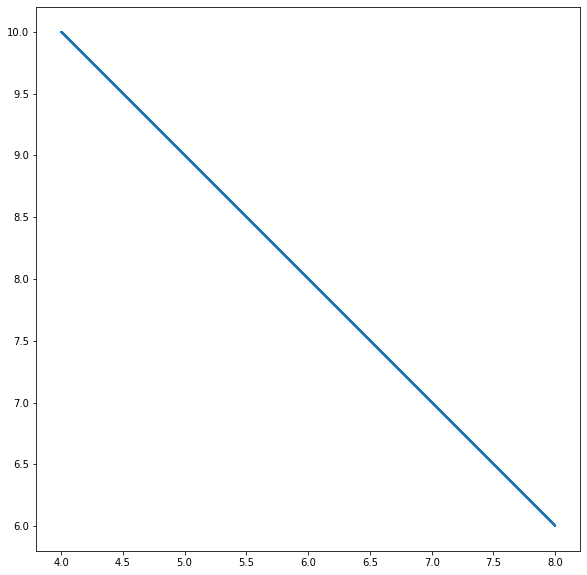

In [51]:
gdf_bergbahnen_linie.plot(figsize=(14,10), markersize=3)

### in Pandas

** Einen zweiten Punkt erstellen**

Quiz: Erstellen Sie für jede Zeile einen Punkt2 anhand der Spalten 'MAX_E' und 'MAX_N'

Tipp: Wir wollen eine lambda-Funktion dafür verwenden

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1,Punkt2
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777),POINT (622992 85864)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797),POINT (622992 85867)


**Eine Linie daraus machen**

Quiz: Erstellen Sie für jede Zeile eine Linie anhand der beiden Punkt-Spalten, die wir zuvor erstellt haben

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1,Punkt2,Linie
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777),POINT (622992 85864),"LINESTRING (621759 85777, 622992 85864)"
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797),POINT (622992 85867),"LINESTRING (622730 86797, 622992 85867)"


**Geometrie neu setzen**

Quiz: Stellen Sie die Geometrie des GDF um auf die Linien-Spalte

**Und Plot:**

Quiz: Ein Plot von allen Luftseilbahnen

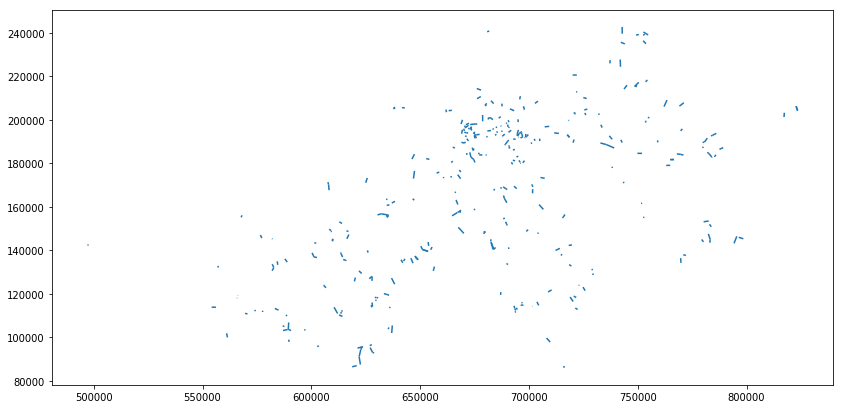

In [36]:
gdf_bergbahnen.geometry

0         LINESTRING (621759 85777, 622992 85864)
1         LINESTRING (622730 86797, 622992 85867)
2         LINESTRING (621991 91079, 622561 87549)
3         LINESTRING (621542 87239, 621973 85824)
4         LINESTRING (621517 87222, 621903 85823)
5       LINESTRING (635480 100882, 635559 100090)
6       LINESTRING (635509 100873, 635567 100091)
7         LINESTRING (621494 87233, 621656 86612)
8         LINESTRING (618779 86517, 620865 87025)
9         LINESTRING (621184 88240, 620925 86925)
10      LINESTRING (642130 155229, 642204 155320)
11        LINESTRING (628987 93322, 629781 92863)
12      LINESTRING (635482 101412, 635931 100871)
13        LINESTRING (621939 91007, 620612 88847)
14        LINESTRING (619879 88521, 620899 88189)
15      LINESTRING (589429 103726, 590692 103181)
16      LINESTRING (783301 145084, 783162 143536)
17        LINESTRING (627027 95334, 628164 93115)
18        LINESTRING (628865 92876, 628191 93082)
19        LINESTRING (628634 94280, 628852 92872)


## Mehrere Layer

Was sich immer gut macht, ist, eine Liste von Punkten auf irgendeinen geografischen Basislayer zu plotten.

An dieser Stelle verwenden wir:
- Das Geodataframe mit den Kantonen
- Das Geodagaframe mit den Bergbahnen

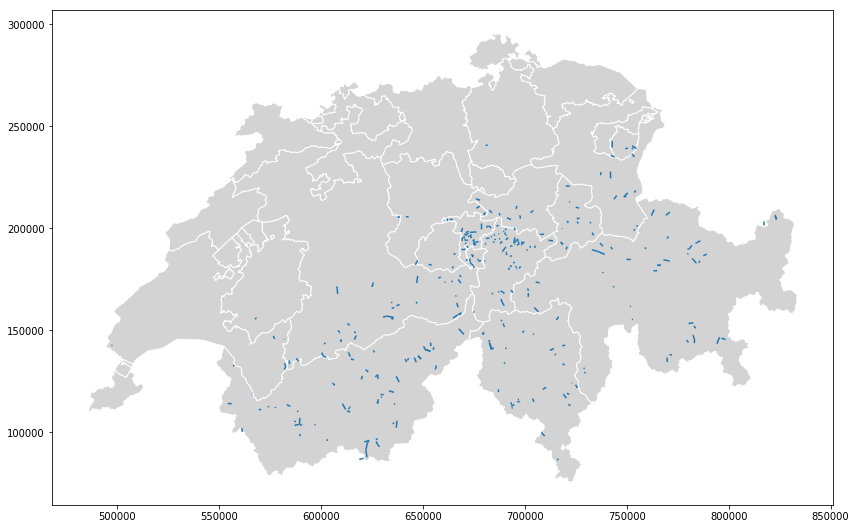

In [37]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3, ax=ax)